In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr


In [3]:
# Function to fetch all planet data from SWAPI
def get_all_planet_data():
    all_planets_data = []

    for planet_id in range(1, 62):  # There are 60 planets in the SWAPI
        api_url = f'https://swapi.dev/api/planets/{planet_id}/'
        response = requests.get(api_url)

        if response.status_code == 200:
            planet_data = response.json()
            all_planets_data.append(planet_data)

    return all_planets_data

In [4]:
# Fetch all planet data
all_planets_data = get_all_planet_data()

# Create a DataFrame from the list of planet data
planets_df = pd.DataFrame(all_planets_data)

In [9]:
# Remove all planets with a diameter of '0' or 'unknown'
planets_df = planets_df[(planets_df['diameter'] != 0)]
planets_df = planets_df[planets_df['diameter'] != 'unknown']

In [6]:
# Remove columns after "population"
planets_df = planets_df.loc[:, :'population']

In [7]:
# Convert diameter to numeric
planets_df['diameter'] = pd.to_numeric(planets_df['diameter'])

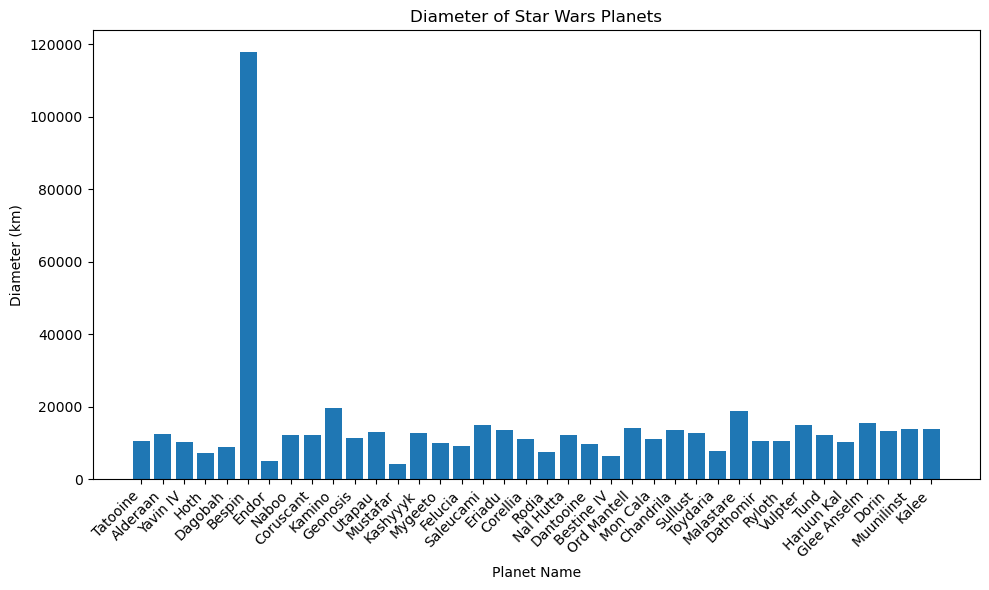

In [10]:
# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(planets_df['name'], planets_df['diameter'])
plt.xticks(rotation=45, ha='right')
plt.title('Diameter of Star Wars Planets')
plt.xlabel('Planet Name')
plt.ylabel('Diameter (km)')
plt.tight_layout()
plt.show()

In [11]:
# Reset the index to ensure correct alignment with y-axis ticks
planets_df.reset_index(drop=True, inplace=True)

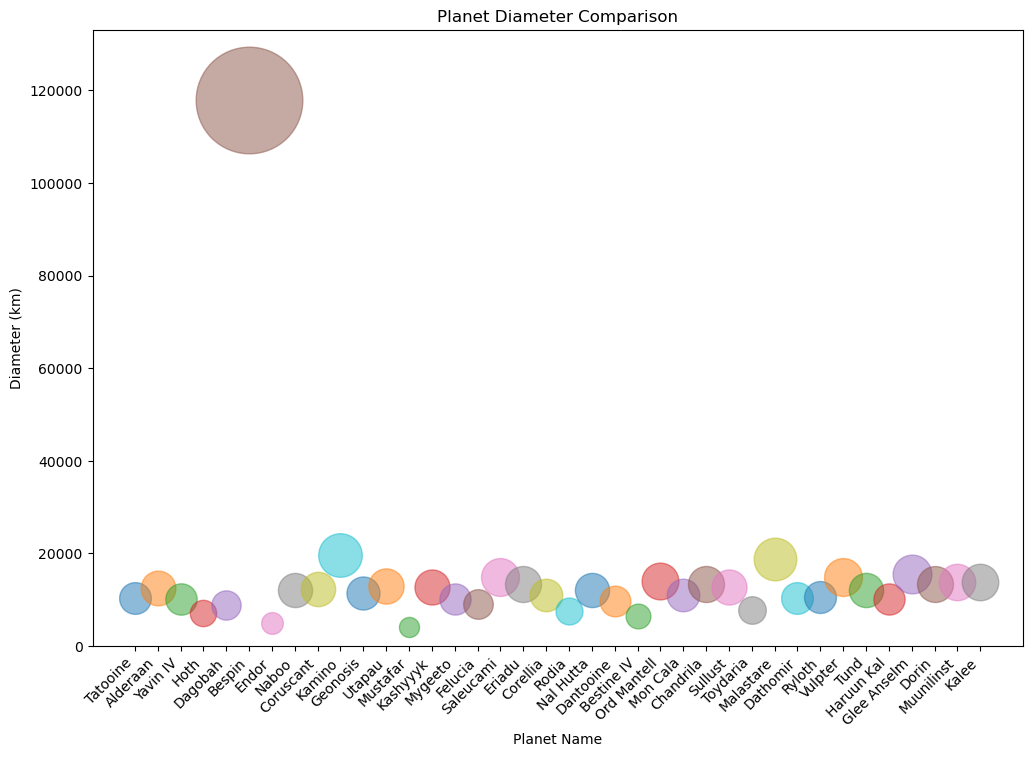

In [12]:
# Set up the plot
plt.figure(figsize=(12, 8))

# Plot circles for each planet based on diameter 
for index, planet in planets_df.iterrows():
    plt.scatter(
        x=index,  
        y=planet['diameter'],  
        s=planet['diameter'] / 20,  # Adjust the scaling factor as needed
        alpha=0.5,
        label=planet['name']
    )

# Set axis labels and title
plt.title('Planet Diameter Comparison')
plt.xlabel('Planet Name')
plt.ylabel('Diameter (km)')

# Set x-axis ticks and labels
plt.xticks(range(len(planets_df)), planets_df['name'], rotation=45, ha='right')

# Set the y-axis limit dynamically
plt.ylim(0, planets_df['diameter'].max() + 15000)

# Show the plot
plt.show()

Basic Statistics for Diameter:
count        38.000000
mean      14344.394737
std       17574.588766
min        4200.000000
25%       10096.000000
50%       12135.000000
75%       13497.500000
max      118000.000000
Name: diameter, dtype: float64


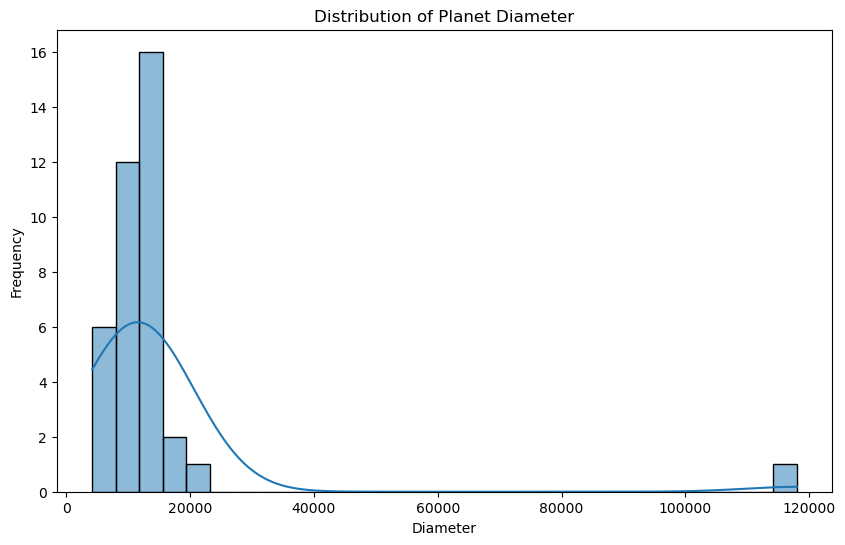

In [17]:
# Basic EDA for diameter
print("Basic Statistics for Diameter:")
print(planets_df['diameter'].describe())

# Visualize the distribution of diameter
plt.figure(figsize=(10, 6))
sns.histplot(planets_df['diameter'].dropna(), bins=30, kde=True)
plt.title('Distribution of Planet Diameter')
plt.xlabel('Diameter')
plt.ylabel('Frequency')
plt.show()

Basic Statistics for Diameter (Excluding Outlier):
count       37.000000
mean     11542.891892
std       3304.762244
min       4200.000000
25%      10088.000000
50%      12120.000000
75%      13490.000000
max      19720.000000
Name: diameter, dtype: float64


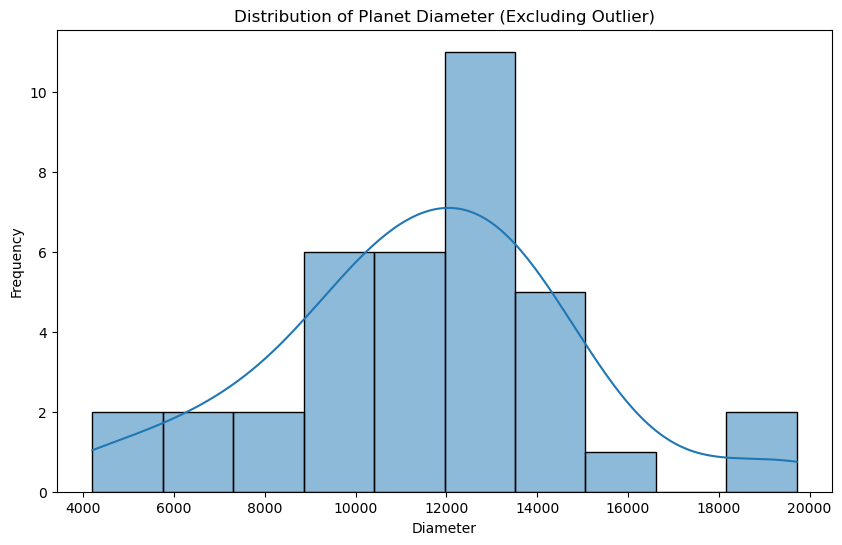

In [22]:
threshold = 40000
filtered_diameter = planets_df['diameter'].loc[planets_df['diameter'] < threshold]

# Basic EDA for diameter
print("Basic Statistics for Diameter (Excluding Outlier):")
print(filtered_diameter.describe())

# Visualize the distribution without the outlier
plt.figure(figsize=(10, 6))
sns.histplot(filtered_diameter.dropna(), bins=10, kde=True)
plt.title('Distribution of Planet Diameter (Excluding Outlier)')
plt.xlabel('Diameter')
plt.ylabel('Frequency')
plt.show()

In [23]:
# Remove all planets with a diameter of '0' or 'unknown'
planets_df = planets_df[(planets_df['population'] != 0)]
planets_df = planets_df[planets_df['population'] != 'unknown']

In [24]:
# Convert population to numeric
planets_df['population'] = pd.to_numeric(planets_df['population'])

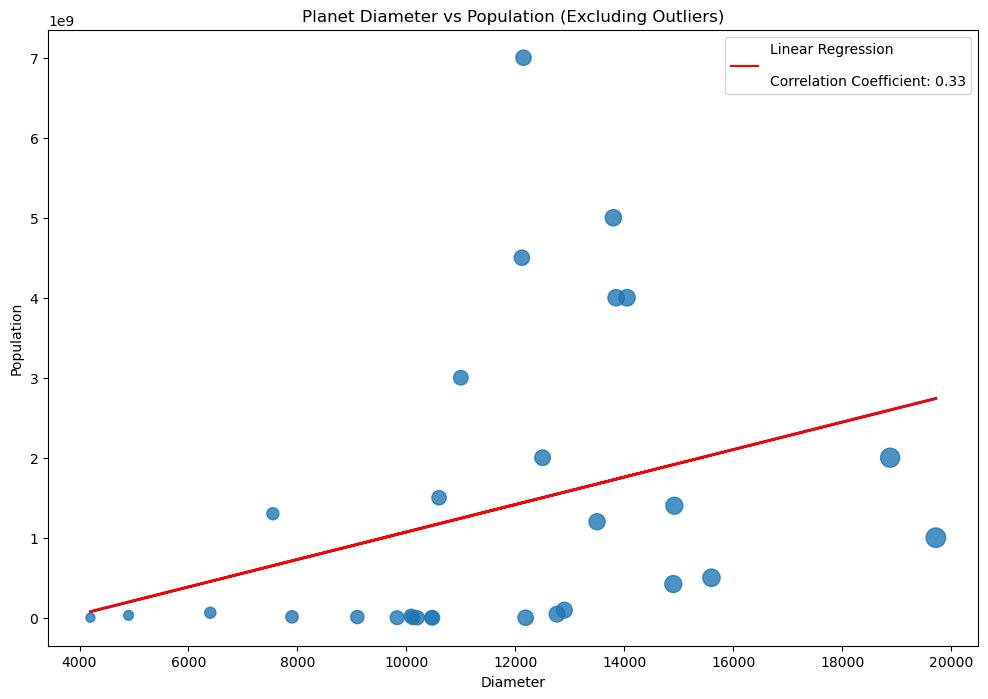

In [25]:
# Remove outliers (arbitrarily chosen threshold values)
diameter_threshold = 20000
population_threshold = 10000000000
filtered_planets_df = planets_df[(planets_df['diameter'] < diameter_threshold) & (planets_df['population'] < population_threshold)]

# Fit a linear regression line
linear_fit = np.polyfit(filtered_planets_df['diameter'], filtered_planets_df['population'], 1)
linear_line = np.polyval(linear_fit, filtered_planets_df['diameter'])

# Set up the plot
plt.figure(figsize=(12, 8))

# Create a scatter plot with a regression line and label
sns.regplot(x='diameter', y='population', data=filtered_planets_df, scatter_kws={'s': filtered_planets_df['diameter'] / 100}, ci=None)

# Set axis labels and title
plt.title('Planet Diameter vs Population (Excluding Outliers)')
plt.xlabel('Diameter')
plt.ylabel('Population')

# Calculate the correlation coefficient
correlation_coef = filtered_planets_df['diameter'].corr(filtered_planets_df['population'])

plt.plot(filtered_planets_df['diameter'], linear_line, color='red', label=f'Linear Regression\n\nCorrelation Coefficient: {correlation_coef:.2f}')


# Add legend
plt.legend()


# Show the plot
plt.show()

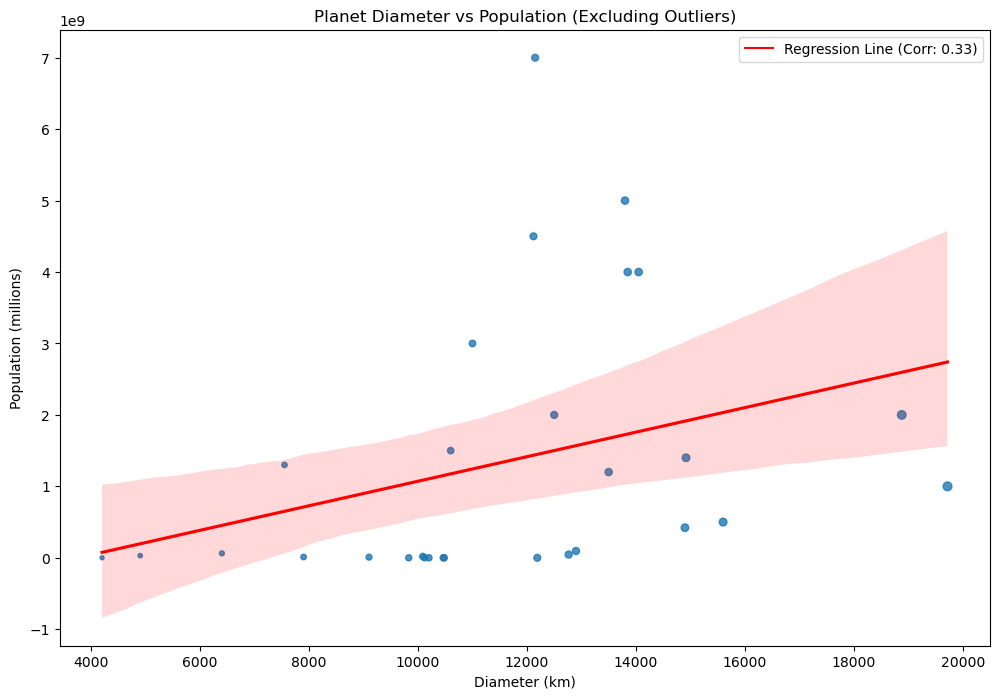

In [103]:
# Remove outliers (arbitrarily chosen threshold values)
diameter_threshold = 20000
population_threshold = 10000000000
filtered_planets_df = planets_df[(planets_df['diameter'] < diameter_threshold) & (planets_df['population'] < population_threshold)]

# Set up the plot
plt.figure(figsize=(12, 8))

# Create a scatter plot with a red regression line, 95% confidence interval, and label
sns.regplot(x='diameter', y='population', data=filtered_planets_df, scatter_kws={'s': filtered_planets_df['diameter'] / 500}, line_kws={'color': 'red'})

# Add a separate line without markers for the legend
plt.plot([], [], color='red', label=f'Regression Line (Corr: {filtered_planets_df["diameter"].corr(filtered_planets_df["population"]):.2f})')

# Set axis labels and title
plt.title('Planet Diameter vs Population (Excluding Outliers)')
plt.xlabel('Diameter (km)')
plt.ylabel('Population (millions)')

# Add legend
plt.legend()

# Show the plot
plt.show()

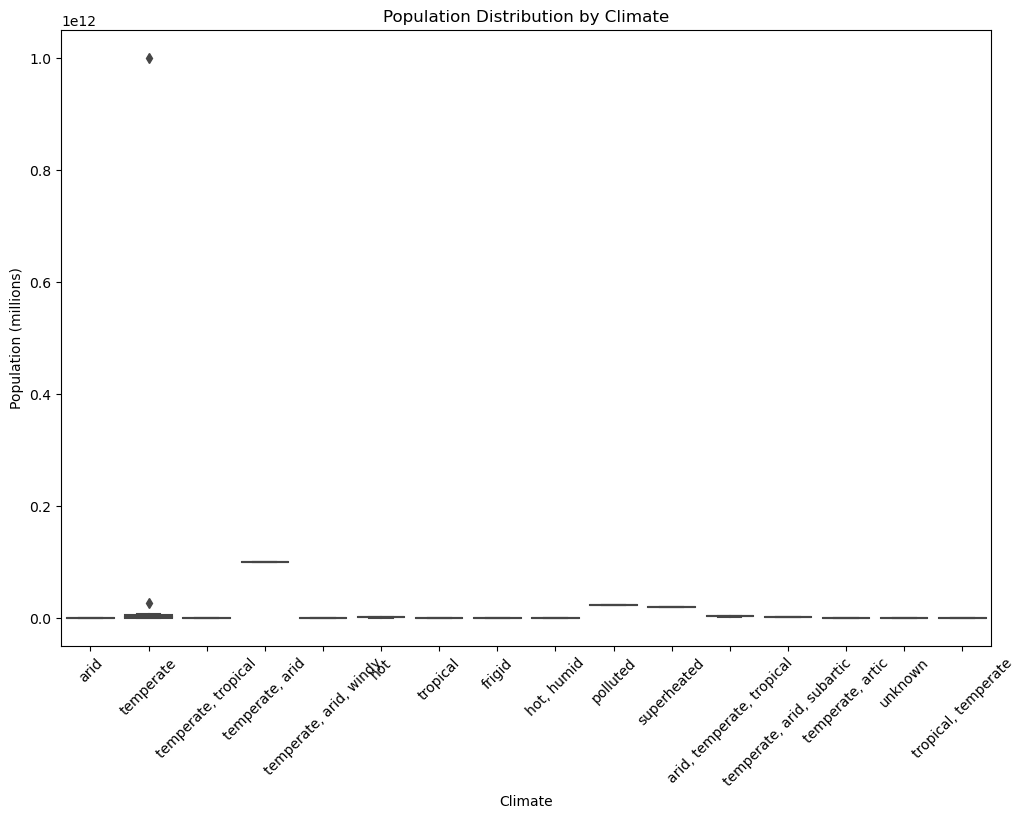

In [106]:
# Set up the plot
plt.figure(figsize=(12, 8))

# Create a box plot
sns.boxplot(x='climate', y='population', data=planets_df)

# Set axis labels and title
plt.title('Population Distribution by Climate')
plt.xlabel('Climate')
plt.ylabel('Population (millions)')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
import requests
import pandas as pd

# Function to fetch data for a specific person
def get_person_data(person_id):
    api_url = f'https://swapi.dev/api/people/{person_id}/'
    response = requests.get(api_url)
    
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to retrieve data for person {person_id}. Status code: {response.status_code}")
        return None

# Get the total number of characters
initial_response = requests.get('https://swapi.dev/api/people/')
total_characters = initial_response.json()['count']

# Create an empty DataFrame to store the data
columns = ['Name', 'Birth Year', 'Gender', 'Height', 'Mass', 'Hair Color', 'Eye Color', 'Skin Color']
characters_df = pd.DataFrame(columns=columns)

# Fetch and append data for each person
for person_id in range(1, total_characters + 1):
    person_data = get_person_data(person_id)
    
    if person_data:
        # Append a new row to the DataFrame
        characters_df = characters_df.append({
            'Name': person_data['name'],
            'Birth Year': person_data['birth_year'],
            'Gender': person_data['gender'],
            'Height': person_data['height'],
            'Mass': person_data['mass'],
            'Hair Color': person_data['hair_color'],
            'Eye Color': person_data['eye_color'],
            'Skin Color': person_data['skin_color'],
        }, ignore_index=True)



In [ ]:
# Display the resulting DataFrame
characters_df

In [ ]:
characters_df['Height'] = pd.to_numeric(characters_df['Height'], errors='coerce')
characters_df['Mass'] = pd.to_numeric(characters_df['Mass'], errors='coerce')

characters_df = characters_df[characters_df['Gender'] != 'none']
#characters_df = characters_df[characters_df['Gender'] != 'hermaphrodite']
characters_df['Gender'] = characters_df['Gender'].replace('n/a', 'Unidentified')


In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Height', data=characters_df, order=['male', 'female', 'Unidentified'], palette='Set2')
plt.title('Box Plot of Height by Gender in Star Wars Characters')
plt.ylabel('Height (cm)')
plt.show()